## Dimensionality Reduction in Linear Regression

The more features in your regression the more complex the model, and the longer it takes to run. Variance in the feature that is unrelated to the outcome $Y$ may create oise in predictions (especially when that variace is shared among features in multicollinearity), more feature also means ore unrelated variance and thereby more noise. Sometimes there may be more predictors than datapoints, leading to a negative degree of freedom which will cause the model no to run. Therefore DS who are sole interested in creating a model(with no interest in interpreting the individual parameters) may turn to dimension reduction method which helps simplify their feature space while retaining all the predictive power of the original model.<br> 

Dimensionality reduction means reducing a matrix of features $X$ into a matrix with fewer columns $R(X)$ where the expected vaule of $Y$ given $X$ ($E(Y|X)$) is equal to the expected value of $Y$ given $R(X)$ - that is after reducing $X$ to $R(X)$ it still predicts $Y$ as exactly as $X$. This sounds a lot like PCA except that instead of trying to reduce $X$ into a smaller set $R(X)$ that contains all the variance in $X$, we are are trying to reduce a set of $X$ into an $R(X)$ that conrains all the variance in $X$ that is shared with the outcome $Y$.  

## Partial least squares regression
This is called PLSR. As in PCA, PLSR is iterative. It first tries to find the vector witin the $n$-dimensional space of $X$ with the highest covaiance with $y$. Then it looks foa a second vector, perpendicular to the first that expalins the highest covariance with $y$ that remains after accounting for the first vector. This continues for as many components as we permit, up to $n$.

SciKit-learn has a function to run PLSR: rather than just resolving the components the PLSR runs the linear model after resolving the component as per the number of allowable features stated.


In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

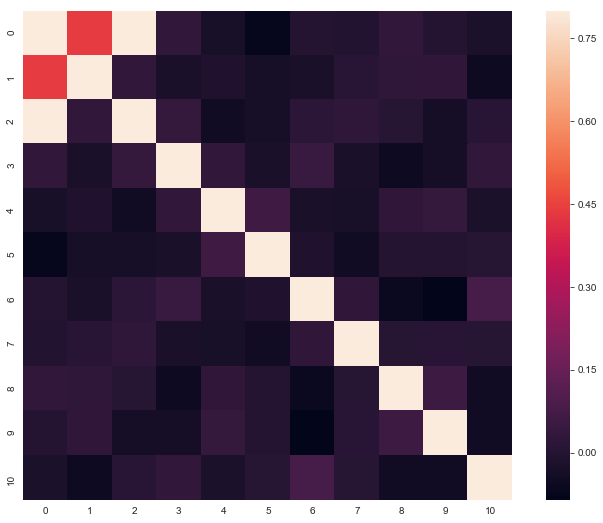

In [2]:
#number of datapoints in outcome(n) adn the number of features(p) are 1000 and 10
n = 1000
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12,9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

R-squared regression: 0.8499932493660461


In [4]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.8499930343321809


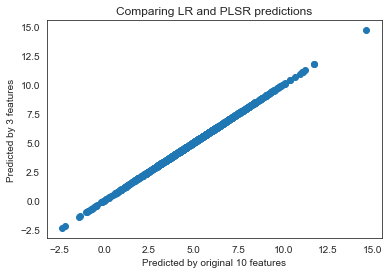

In [5]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc). The trick to successful PLSR is to select the right number of components to keep.

### Drill
Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

Implementing Partial Least Squares Regression with 1 components
R-squared PLSR for 1 components: 0.8452378932993057 

Implementing Partial Least Squares Regression with 2 components
R-squared PLSR for 2 components: 0.8499665135896557 

Implementing Partial Least Squares Regression with 3 components
R-squared PLSR for 3 components: 0.8499930343321809 

Implementing Partial Least Squares Regression with 4 components
R-squared PLSR for 4 components: 0.8499932463130195 

Implementing Partial Least Squares Regression with 5 components
R-squared PLSR for 5 components: 0.8499932493608562 

Implementing Partial Least Squares Regression with 6 components
R-squared PLSR for 6 components: 0.8499932493660454 

Implementing Partial Least Squares Regression with 7 components
R-squared PLSR for 7 components: 0.8499932493660461 

Implementing Partial Least Squares Regression with 8 components
R-squared PLSR for 8 components: 0.8499932493660463 

Implementing Partial Least Squares Regression with 9 com

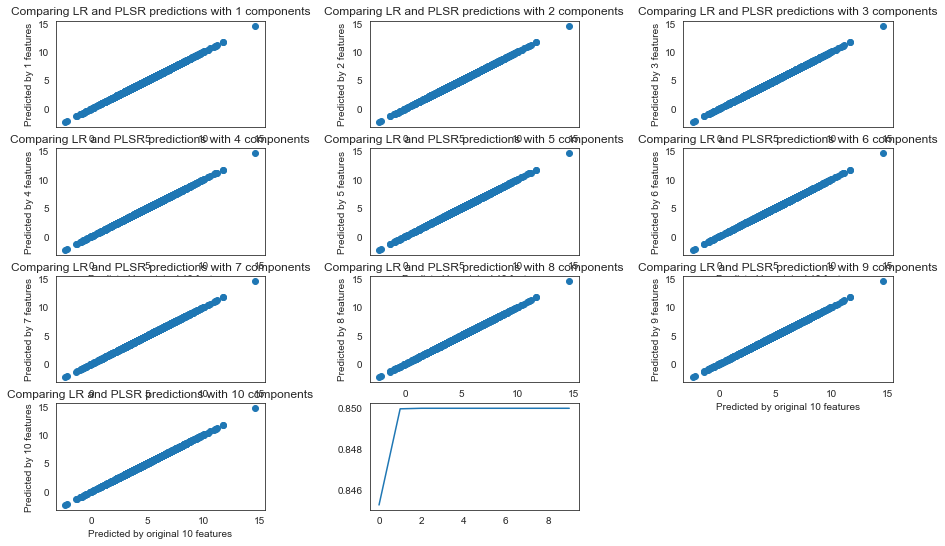

In [6]:
plt.figure(figsize=(15, 9))

rsquares = []
for i in range(10):
    print('Implementing Partial Least Squares Regression with {} components'.format(i+1))
    #since we can't have 0 component, hence i+1. We start will one component and increase till 10
    pls_n = PLSRegression(n_components=i+1)
    pls_n.fit(X, y)
    Y_PLS_pred = pls1.predict(X)
    rsquares.append(pls_n.score(X, y))
    print('R-squared PLSR for {} components: {} {}'.format(i+1, pls_n.score(X, y), "\n"))
    
    # Compare the predictions of the two models
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by {} features'.format(i+1))
    plt.title('Comparing LR and PLSR predictions with {} components'.format(i+1))
    
#plot the rsquared a t the 11th position    
plt.subplot(4, 3, 11)    
plt.plot(rsquares)

#show all plots
plt.show()    
    

# unit2_lesson6_The Gradient Descent Algorithm
So far when explaining how regression works, we've said that it finds the model of best fit by minimizing the squared distance between each datapoint and the line of fit. Squaring the distance removes concerns about positive vs negative signs, and has a heavier penalty for larger distances.

The cost function for a linear regression model $y_i = \alpha + \beta x_i$ is:

$$\frac1{n}\sum_{i=1}^n(y_i-(\alpha + \beta x_i))^2$$

where $\alpha + \beta x_i$ is the prediction of the model $\alpha + \beta x$ for predictors $x_i$, $y_i$ is the actual outcome value, and $n$ is the number of distances being summed. For many linear regressions, the model is sufficiently simple that the true minimum of the cost function can be calculated by solving a system of equations.  However, many other models that we will encounter from this point forward are _too complex_ to be solved for a true minimum.  For those models it's useful to use an iterative algorithm that starts from a random set of parameters and slowly works toward optimizing the cost function.

One such algorithm is **gradient descent**, which iteratively minimizes the cost function using derivatives.  This approach is robust and flexible, and can be applied to basically any differentiable function.

Now we're going to get into the nuts-and-bolts of how gradient descent works (and what differentiable functions are). Hold on to your hats, we're gonna do some calculus!

As learned from PCA, data is a multidimensional space. While optimizing a linear regression, the dimension of the space is the number of parameters plus the error function we are trying to minimize. This model: $y_i = \alpha + \beta x_i$ with two parameters will have 3 dimensions in space. Within this 3D is space is a *surface* made of all possible combination of parameter values and the error values that result when we plug those parameters into the cost function. (In a two-dimensional space, we have lines.  In three dimensions and higher, we have surfaces.) <br>

The *gradient descent algorithm* works iteratively by: picking a location on the surface through a combination of parameter values, calculating the direction from that point with the steepest 'downhill' gradient, and then moving 'downhill' predetermined distance. The the algothm picks the new parameter values of that location on the interface, re-calculates the direction of 'downhil' and moves the same set distance again. This continues until the algorithms locates a point on the interface where all possible gradient away from that location are uphill(i.e a point of inflection, a point where all other possible combinations of parameters result in higher error values). The parameters values that define that point of inflection represent the "optimized" solution to the cost function and are what the regression returns as a solution. <br>

The down hill direction is determined by differentiating the cost function and taking the patial derivative of each parameter of the regression equation.  A function is "differentiable" if a derivative can be calculated at each value of the function. A derivative, in turn, is a measure of how sensitive a quantity is to change in another quantity. In other words, if there is a function $f$ that contains parameters $x$ and $y$, the partial derivative for $x$ (expressed as $\frac{\partial}{\partial y}$) will tell us how much $y$ will change for each unit change in $x$.  We could also calculate $\frac{\partial}{\partial x}$, to find out how much a one-unit change in $y$ will impact $x$. <br>

For our two-parameter regression line model, the derivatives are:

$$\frac{\partial}{\partial\alpha} =\frac2n \sum_{i=1}^n - (y^i-(\alpha + \beta x_i) )$$, using power and chainrule

$$\frac{\partial}{\partial\beta} =\frac2n \sum_{i=1}^n - x_i(y^i-(\alpha + \beta x_i))$$
Since these are the minutestest changesin our error components each of these bits will be multiplied by a chosen weight or pace and thereby the $2$ in the above equations can be ignored. E.g a weight of $0.002$ can be chosen rather than $0.001$ after eliminating the $2$. 

##### Decision points
There are 3 main decision points in Gradient descent algorithm:
###### What are the starting values of the parameters? 
Many implementations will start by setting all parameters to zero. However, any random values may be desirable.
###### What should be our downhil movement pace or learning rate?. 
A too-small learning rate means the model will be computationally inefficient and take a long time to converge (stop). A too-large learning rate can result in overshooting the target minimum, resulting in a model that never converges. Again, most algorithm implementations have pre-determined criteria for setting the learning rate, but these can also be set manually. 
###### When do we stop?
In the description above, it sounds like the model runs until it reaches the "optimal" solution. In reality, this isn't computationally efficient. As the gradient flattens out and we get closer and closer to the minimum value of the error, each iteration of the algorithm will result in a smaller and smaller change in the error. This can get really slow. Typically some "minimal acceptable change" is decided on a-priori – once the change in error from iteration n-1 to iteration n is smaller than the threshold, the algorithm stops. To prevent an algorithm that never stops, there is usually also a maximum number of permitted iterations before the gradient stops, even if it hasn't achieved a change under the threshold.

### Creating a Gradient Descent Algorithm


Coefficients from sklearn: 
 [[2.00759214]]

Intercept from sklearn: 
 [0.47950366]

Coefficients from gradient descent algorithm: 
 1.8799778384929515

Intercept from gradient descent algorithm: 
 0.4850372157626047


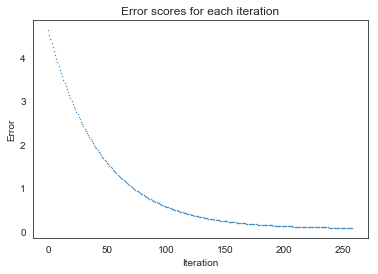

In [23]:
#create a function that returns the error cost or rsquare. 
def LR_cost_function(alpha, beta, x, y):
    n = len(x)
    #initialise error to which error from each datapoint would be added later
    error = 0
    #we want to sum all the resudual error for each data point following the calculated alpha/beta
    for i in range(n):
        error_per_datapoint = (y[i] - (alpha + beta*x[i]))**2
        error += error_per_datapoint
    #return the average error as per cost function formula
    return error/n

#declear function to generate optimum alhpa and beta for each data point using the GD method
#here I will preset minimum error difference(.001) between successive iteration of the GD while 
#int it's bid to search for optimum alpha and beta, this ensures convergence in the algorithm. after each iteration
#alternatively, I could have stated the number iteration as done in the curiculum
#I will preset the learning rate(pace) to .005
#alpha and beta will be initialize as 0, any random initials values will also do

def GD_step(alpha_cur, beta_cur, learning_rate, x, y):
    n = len(x)
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
    
        # Partial derivative of the intercept.
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha

        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
    
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

#Now we got the a function(GD_step) that returns the optimized values of alpha and better after
#a cycle of iteration as well as the the one that calculates the sum of residual error after using those values
#in our cost function(LR_cost_function) for every observation, the next question is what should the minimum error value
#at which we will consider our solution and by extension the values of apha and beta optimum(according to the drill 
#we will be be using 0.001), our starting values for alpha and beta will also be 0.

# How many steps to take. this will be the mininmum residual error we want.
error_threshold = 0.001

# How far to move with each step.
learning_rate = .005

# Starting values for intercept and slope 
alpha_start = 0
beta_start = 0

# Time to make some test data!
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit an true minimum regression using solved equations, we will compare the output of our algorithm with this.
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)

# Now fit an iteratively optimized regression using our custom gradient
# descent algorithm.

# Storing each iteration to inspect later.
all_error=[]

# Provide starting values.
alpha = alpha_start
beta = beta_start


while True:
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = GD_step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error.
    error = LR_cost_function(alpha, beta, x, y)
    if error <= 0.086:
        break    # break here
    
    # Store the error to instpect later.
    all_error.append(error)    
    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()    

        